In [191]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import os
import glob
import matplotlib as mpl
from mpl_toolkits.mplot3d import Axes3D
from matplotlib import cm
from mpl_toolkits.axes_grid1.inset_locator import zoomed_inset_axes, mark_inset
import matplotlib.patches as mpatches
from matplotlib.offsetbox import AnchoredText
import scipy as sp
import scipy.fftpack
from scipy.signal import chirp, find_peaks, peak_widths
from scipy.fft import fft, fftfreq
plt.style.use(['science','nature','notebook'])

import struct
import sys
sys.path.append("..")

In [ ]:
dt = np.dtype('f')

data = np.fromfile("2022.07.28_11.20.52_1.1.1.1.A.bin", dtype=dt)

df = pd.DataFrame(data)

In [ ]:
#plt.plot(10 * np.log10(df))
plt.plot(df)


In [ ]:
df

In [ ]:
dftxt = pd.read_fwf("2022.07.28_11.21.28_1.1.1.1.A.txt", delimiter="\,")#,engine='python')

In [ ]:
dfdata = dftxt.iloc[39:].copy()
dfdata = dfdata.reset_index(drop=True)
dfdata[['Sample','Time','Value','Volts']] = dfdata['[AlazarData]'].str.split(',', expand=True)
dfdata = dfdata[['Sample','Time','Value','Volts']]

dfdata

In [355]:
#datatxt = np.fromfile("2022.07.28_12.02.00_1.1.1.1.A.txt")
dfA = pd.read_csv("2022.07.28_15.43.07_1.A.txt",names=['Volts'])
dfB = pd.read_csv("2022.07.28_15.43.07_1.B.txt",names=['Volts'])
dftxt=dfA
#dftxt = pd.read_csv("2022.07.28_15.25.16_1.A.txt",names=['Volts'])
#dftxt = pd.DataFrame(datatxt)

In [356]:
size = 8192
dftxtlist = [dftxt.loc[i:i+size-1,:] for i in range(0, len(dftxt),size)]

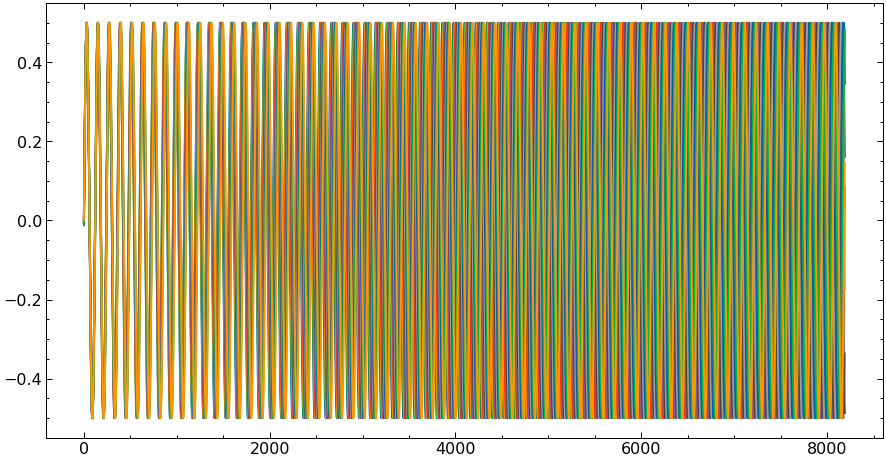

In [357]:
plt.figure(figsize=(15,8))
for n in range(len(dftxtlist)):
    plt.plot(range(len(dftxtlist[0])),dftxtlist[n]['Volts'])
#plt.xlim(0,3000)
#plt.plot(10 * np.log10(dftxt))


Text(0.5, 0, 'Mhz')

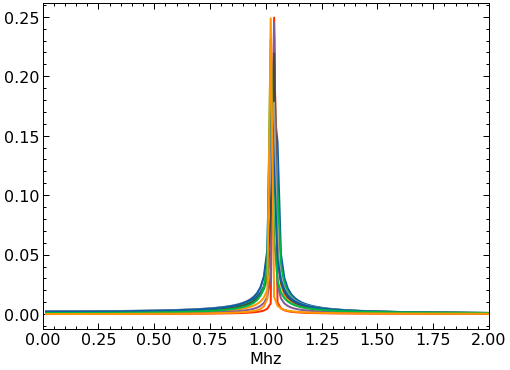

In [358]:
for n in range(len(dftxtlist)):
    N = len(dftxtlist[n])
    sample_rate=62.48e6
    T = 1.0 / sample_rate

    x = np.linspace(0.0, N*T, N, endpoint=False)
    y = list(dftxtlist[n]['Volts'])

    yf = fft(y)
    xf = fftfreq(N, T)[:N//2]

    plt.plot(2*xf[1:]/1e6, 1/N * np.abs(yf[1:N//2]))

plt.xlim(0,2)
plt.xlabel('Mhz')
#plt.ylabel('V')

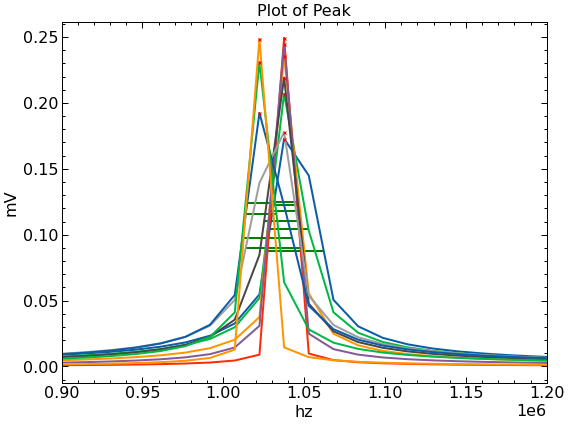

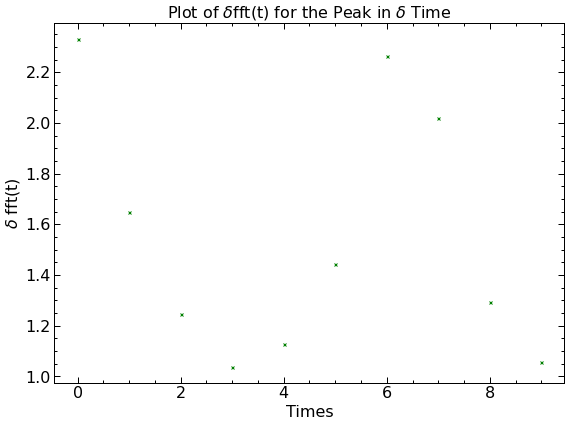

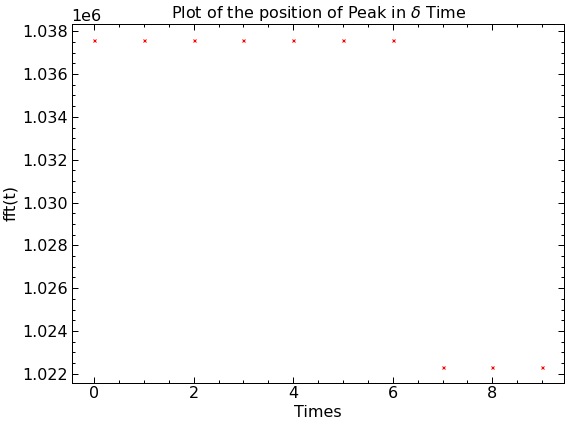

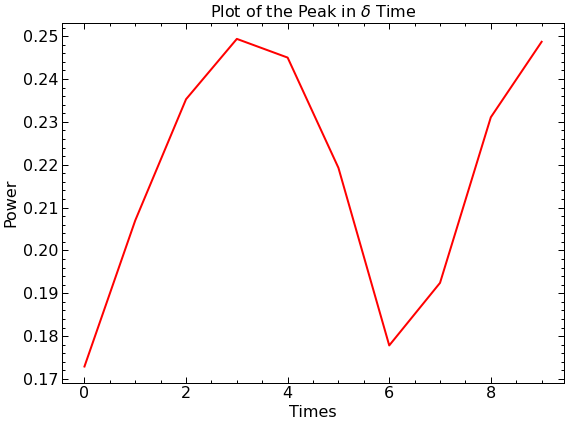

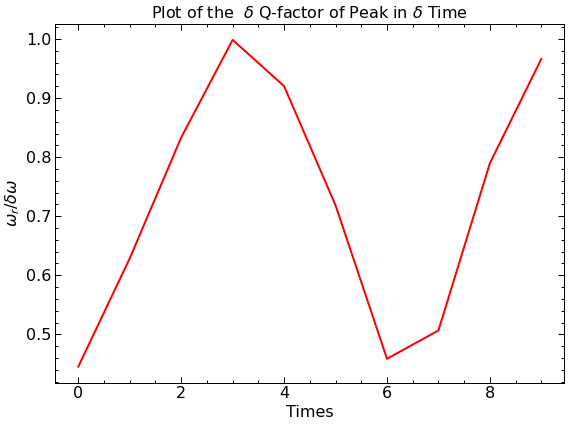

In [361]:


peaksx=[]
peaksy=[]
widths=[]
width_heights=[]
widthstart=[]
widthend=[]
Qfactor=[]

for n in range(len(dftxtlist)):
#for n in [0,1,2,3]:
    N = len(dftxtlist[n])
    sample_rate=62.5e6
    T = 1.0 / sample_rate

    x = np.linspace(0.0, N*T, N, endpoint=False)
    y = list(dftxtlist[n]['Volts'])

    yf = fft(y)
    xf = fftfreq(N, T)[:N//2]

    xfa = 2*xf
    yfa = 1/N*np.abs(yf[0:N//2])

    peaks,_= find_peaks(yfa, height=0.05, distance=8192)
    peaksx.append(xfa[peaks[0]])
    peaksy.append(yfa[peaks[0]])

    results_half = peak_widths(yfa, peaks, rel_height=0.5)
    widths.append(results_half[0])
    width_heights.append(results_half[1])
    widthstart.append(xfa[int(results_half[2])]+(xfa[1]*(results_half[2]-int(results_half[2]))))
    widthend.append(xfa[int(results_half[3])]+(xfa[1]*(results_half[3]-int(results_half[3]))))
    Qfactor.append((xfa[peaks[0]]/(results_half[0]*1e6)))

    plt.hlines(results_half[1],xfa[int(results_half[2])]+(xfa[1]*(results_half[2]-int(results_half[2]))),xfa[int(results_half[3])]+(xfa[1]*(results_half[3]-int(results_half[3]))),color="g")

    plt.plot(xfa, yfa)

plt.plot(peaksx,peaksy,"x",color="r")

plt.xlim(0.9e6,1.2e6)
plt.xlabel('hz')
plt.ylabel('mV')
plt.title('Plot of Peak')
plt.tight_layout()

## others
plt.figure()
plt.plot(np.arange(len(widths)),widths,"x",c='g')
plt.title('Plot of $\delta$fft(t) for the Peak in $\delta$ Time')
plt.xlabel('Times')
plt.ylabel('$\delta$ fft(t)')
plt.tight_layout()

plt.figure()
plt.plot(np.arange(len(peaksx)),peaksx,"x",c='r')
plt.title('Plot of the position of Peak in $\delta$ Time')
plt.xlabel('Times')
plt.ylabel('fft(t)')
plt.tight_layout()

plt.figure()
plt.plot(np.arange(len(peaksy)),peaksy,c='r')
plt.title('Plot of the Peak in $\delta$ Time')
plt.xlabel('Times')
plt.ylabel('Power')
plt.tight_layout()

plt.figure()
plt.plot(np.arange(len(peaksx)),Qfactor,c='r')
plt.title('Plot of the  $\delta$ Q-factor of Peak in $\delta$ Time')
plt.xlabel('Times')
plt.ylabel('$\omega_r/\delta\omega$')
plt.tight_layout()

# plt.plot(2*xf[1:]/1e6, 1/N * np.abs(yf[1:N//2]))


# peaks,_= find_peaks(1/N * np.abs(yf[1:N//2]), height=0.01)
# plt.plot(2*xf[peaks[0]]/1e6 ,1/N * np.abs(yf[1:N//2])[peaks[0]], "x",color="r")

# #results_half = peak_widths(dfft000[0][start:end], peaks, rel_height=0.5)
# plt.xlim(0,2)



In [365]:
xfa[peaks[0]],(results_half[0])

(1022338.8671874999, array([1.05791722]))

In [302]:
results_half,results_half[3]-results_half[2]

((array([2.32963481]),
  array([0.08756539]),
  array([67.27827236]),
  array([69.60790717])),
 array([2.32963481]))

In [325]:
xfa[int(results_half[2])]+(xfa[1]*(results_half[2]-int(results_half[2]))),xfa[int(results_half[3])]+(xfa[1]*(results_half[3]-int(results_half[3])))


(array([1306827.51344715]), array([1692895.42736336]))

In [334]:
xfa[1]

15258.789062499998

In [ ]:
np.diff(peaks)
results_half = peak_widths(dfft000[0][start:end], peaks, rel_height=0.5)
widths = results_half[0]
width_heights = results_half[1]

widths, peaks+start, np.diff(peaks)